## Map features name

In [ ]:
import json
import pandas as pd
import ast
import numpy as np

with open('feature_names.json', 'r') as json_file:
    feature_dict = json.load(json_file)
    
number_to_feature = {v: k for k, v in feature_dict.items()} 

reportFeatureSelectionDf = pd.read_excel('/Users/wachiii/Workschii/brain-mdd/models/feature_selection/results_280225.xlsx')

In [ ]:
channelLst = ["Fp1", "Fp2", "F3", "F4", "C3", "C4", "P3", "P4", "O1", "O2", "F7", "F8", "T3", "T4", "T5", "T6"]
bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]

psdFeatureNames = [f'PSD_{ch}_{band}' for ch in channelLst for band in bands]
relativePowerFeatureNames = [f'RelativePower_{ch}_{band}' for ch in channelLst for band in bands]
coh_pairs = [(channelLst[i], channelLst[j]) for i in range(len(channelLst)) for j in range(i+1, len(channelLst))]
cohFeatureNames = [f'Coherence_{ch1}_{ch2}_{band}' for ch1, ch2 in coh_pairs for band in bands]
hfdFeatureNames = [f'HFD_{ch}' for ch in channelLst]
cdFeatureNames = [f'CD_{ch}' for ch in channelLst]
allFeatureNames = (
    psdFeatureNames + relativePowerFeatureNames + cohFeatureNames + hfdFeatureNames + cdFeatureNames
)
print(f"Total number of features: {len(allFeatureNames)}") 

# import json
# feature_dict = {feature_name: index+1 for index, feature_name in enumerate(allFeatureNames)}

# with open('feature_names.json', 'w') as json_file:
#     json.dump(feature_dict, json_file, indent=4)

In [ ]:
significantFeat = reportFeatureSelectionDf["significant_features"]
significantFeat.head()

In [ ]:
all_significant_features = []

for features_str in reportFeatureSelectionDf["significant_features"]:
    features_list = ast.literal_eval(features_str)
    all_significant_features.append(features_list)

In [ ]:
print(all_significant_features)

In [ ]:
feature_counts = {
    'psd': 0,
    'relative_power': 0,
    'coherence': 0,
    'hfd': 0,
    'cd': 0
}

# Loop over each row in the significant features list
for feature_list in all_significant_features:
    if isinstance(feature_list, list):  # Ensure it's a list
        for feature_number in feature_list:
            feature_number_str = str(feature_number)  # Convert feature number to string
            
            # Check if the feature number exists in the reversed dictionary
            if feature_number in number_to_feature:
                feature_name = number_to_feature[feature_number]
                print(f"Feature number: {feature_number} -> Feature name: {feature_name}")  # Debugging line
                
                # Check the prefix of the feature name to determine its type
                if feature_name.startswith("PSD"):
                    feature_type = "psd"
                elif feature_name.startswith("RelativePower"):
                    feature_type = "relative_power"
                elif feature_name.startswith("Coherence"):
                    feature_type = "coherence"
                elif feature_name.startswith("HFD"):
                    feature_type = "hfd"
                elif feature_name.startswith("CD"):
                    feature_type = "cd"
                else:
                    continue  # Skip if it's an unknown feature type
                
                # Increment the count for the corresponding feature type
                if feature_type in feature_counts:
                    feature_counts[feature_type] += 1
            else:
                print(f"Feature number {feature_number} not found in JSON.")  # Debugging line

# Output the counts for each feature type
print("Feature counts:")
for feature_type, count in feature_counts.items():
    print(f"{feature_type}: {count}")

In [ ]:
print("Feature counts:")
for feature_type, count in feature_counts.items():
    print(f"{feature_type}: {count}")

## Model Performance - CV

In [1]:
import dotenv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


dotenv.load_dotenv()
allFeatureCvPath = os.getenv("ALL_FEATURES_CV_DIR_PATH")
allFeatureCvReportPath = allFeatureCvPath + "/results_allfeatures.xlsx"
bandpowerCvPath = os.getenv("BANDPOWER_FEATURES_CV_DIR_PATH")
bandpowerCvReportPath = bandpowerCvPath + "/results_bandpower.xlsx"
cdCvPath = os.getenv("CD_FEATURES_CV_DIR_PATH")
cdCvReportPath = cdCvPath + "/results_cd.xlsx"
cohCvPath = os.getenv("COH_FEATURES_CV_DIR_PATH")
cohCvReportPath = cohCvPath + "/results_coh.xlsx"
hfdCvPath = os.getenv("HFD_FEATURES_CV_DIR_PATH")
hfdCvReportPath = hfdCvPath + "/results_hfd.xlsx"
relativePowerPath = os.getenv("RELATIVEPOWER_FEATURES_CV_DIR_PATH")
relativePowerCvReportPath = relativePowerPath + "/results_relativepower.xlsx"

allFeatureCvReport = pd.read_excel(allFeatureCvReportPath)
bandpowerCvReport = pd.read_excel(bandpowerCvReportPath)
cdCvReport = pd.read_excel(cdCvReportPath)
cohCvReport = pd.read_excel(cohCvReportPath)
hfdCvReport = pd.read_excel(hfdCvReportPath)
relativePowerCvReport = pd.read_excel(relativePowerCvReportPath)

In [2]:
# print column names
print(allFeatureCvReport.columns)

Index(['model', 'feature_selection', 'avg_accuracy', 'avg_precision',
       'avg_recall', 'avg_f1_score', 'final_accuracy', 'final_precision',
       'final_recall', 'final_f1_score', 'significant_features',
       'folds_accuracy', 'folds_precision', 'folds_recall', 'folds_f1_score',
       'fold_hc_train', 'fold_mdd_train', 'fold_hc_val', 'fold_mdd_val',
       'fold_hc_test', 'fold_mdd_test'],
      dtype='object')


### Choose Report

In [12]:
currentReport = relativePowerCvReport
currentWorkDir = relativePowerPath
whichFeatures = "Relative Power"
allFoldsAccuracy = []

for foldsAccuracyStr in currentReport["folds_accuracy"]:
    foldsAccuracyList = list(foldsAccuracyStr.split(","))
    foldsAccuracyList[0] = foldsAccuracyList[0][1:]   
    foldsAccuracyList[-1] = foldsAccuracyList[-1][:-1]  
    foldsAccuracyList = [float(i) for i in foldsAccuracyList]
    allFoldsAccuracy.append(foldsAccuracyList)

### Ventrical Box Plot

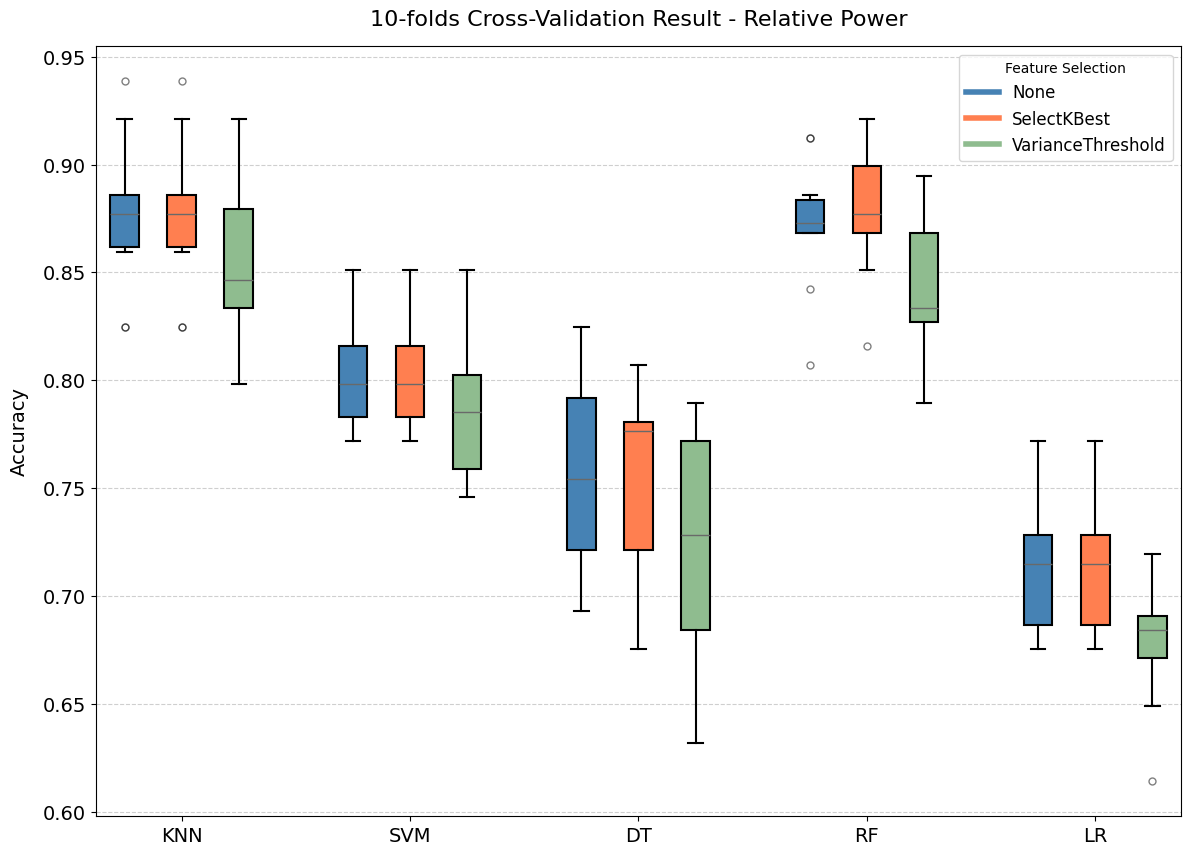

In [13]:
modelsLst = ["KNN", "SVM", "DT", "RF", "LR"]
featureSelectionLst = ["None", "SelectKBest", "VarianceThreshold"]
colors = {"None": "royalblue", "SelectKBest": "darkorange", "VarianceThreshold": "seagreen"}
boxColors = ["steelblue", "coral", "darkseagreen"]

fig, ax = plt.subplots(figsize=(14, 10))
xPositions = []
x_labels = []
boxWidth = 0.5 

for i, model in enumerate(modelsLst):
    for j, feature in enumerate(featureSelectionLst):
        x_pos = i * 4 + j  
        xPositions.append(x_pos)
        ax.boxplot(allFoldsAccuracy[i * 3 + j], positions=[x_pos], widths=boxWidth, patch_artist=True,
                   boxprops=dict(facecolor=boxColors[j], linewidth=1.5),
                   medianprops=dict(color='dimgrey', linewidth=1),
                   whiskerprops=dict(linewidth=1.5),
                   capprops=dict(linewidth=1.5),
                   flierprops=dict(marker='o', markersize=5, alpha=0.5))
    x_labels.append(model)

ax.set_xticks([np.mean(xPositions[i * 3 : i * 3 + 3]) for i in range(len(modelsLst))])
ax.set_xticklabels(x_labels, fontsize=14)
ax.tick_params(axis='y', labelsize=14) 

ax.set_ylabel("Accuracy", fontsize=14, labelpad=10)
graphTitle = f"10-folds Cross-Validation Result - {whichFeatures}"
ax.set_title(graphTitle, fontsize=16, pad=15)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in boxColors]
ax.legend(handles, featureSelectionLst, title="Feature Selection", fontsize=12, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.savefig(f"{currentWorkDir}/venti_boxplot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Block Plot

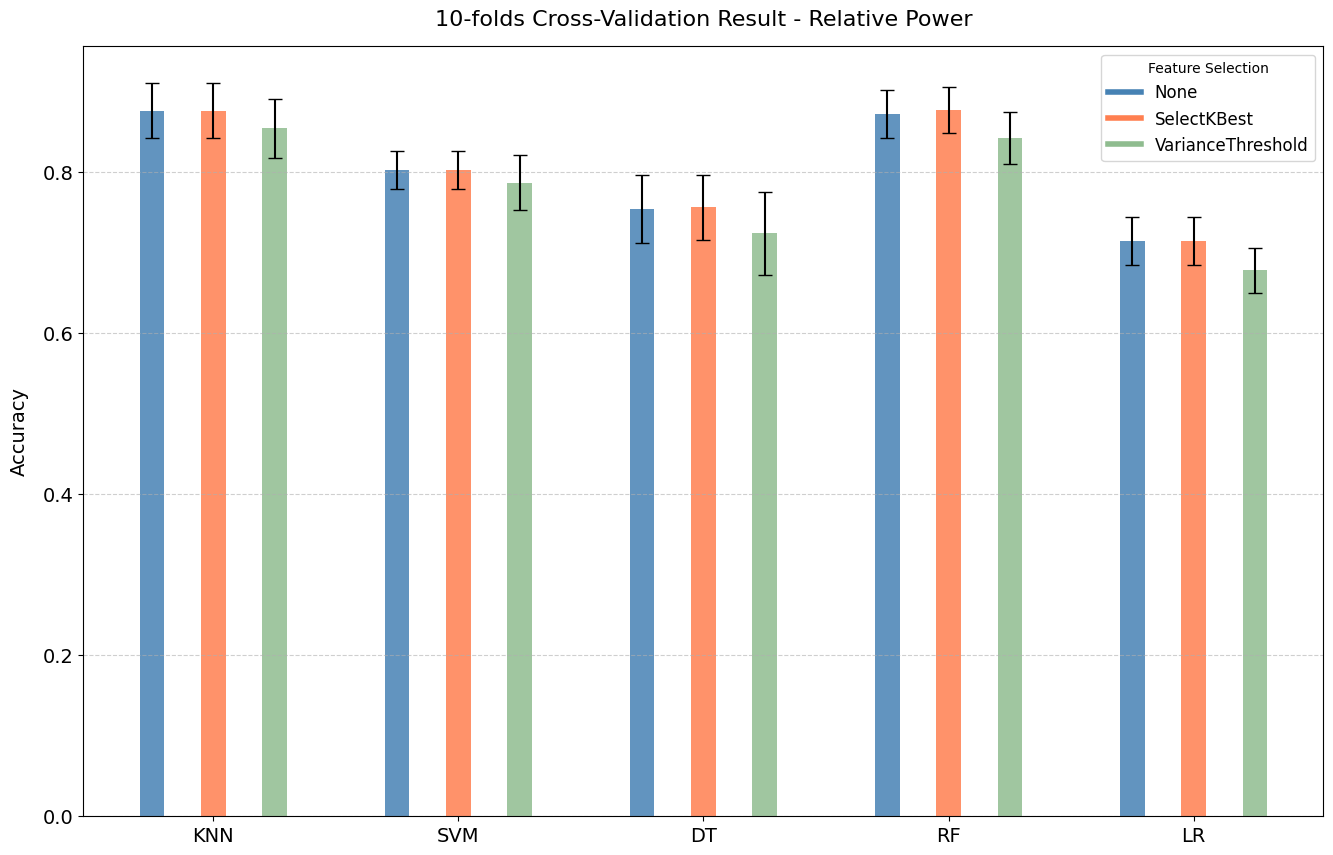

In [14]:
modelsLst = ["KNN", "SVM", "DT", "RF", "LR"]
featureSelectionLst = ["None", "SelectKBest", "VarianceThreshold"]
colors = {"None": "royalblue", "SelectKBest": "darkorange", "VarianceThreshold": "seagreen"}
boxColors = ["steelblue", "coral", "darkseagreen"]

means = [np.mean(acc) for acc in allFoldsAccuracy]
stds = [np.std(acc) for acc in allFoldsAccuracy]

fig, ax = plt.subplots(figsize=(16, 10))
bars = ax.bar(xPositions, means, yerr=stds, capsize=5, color=boxColors * len(modelsLst), width=0.4, alpha=0.85)

ax.set_xticks([np.mean(xPositions[i * 3 : i * 3 + 3]) for i in range(len(modelsLst))])
ax.set_xticklabels(x_labels, fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel("Accuracy", fontsize=14, labelpad=10)
graphTitle = f"10-folds Cross-Validation Result - {whichFeatures}"
ax.set_title(graphTitle, fontsize=16, pad=15)
ax.grid(axis="y", linestyle="--", alpha=0.6)
ax.legend(handles, featureSelectionLst, title="Feature Selection", fontsize=12)

plt.savefig(f"{currentWorkDir}/blockplot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Horizontal Box Plot

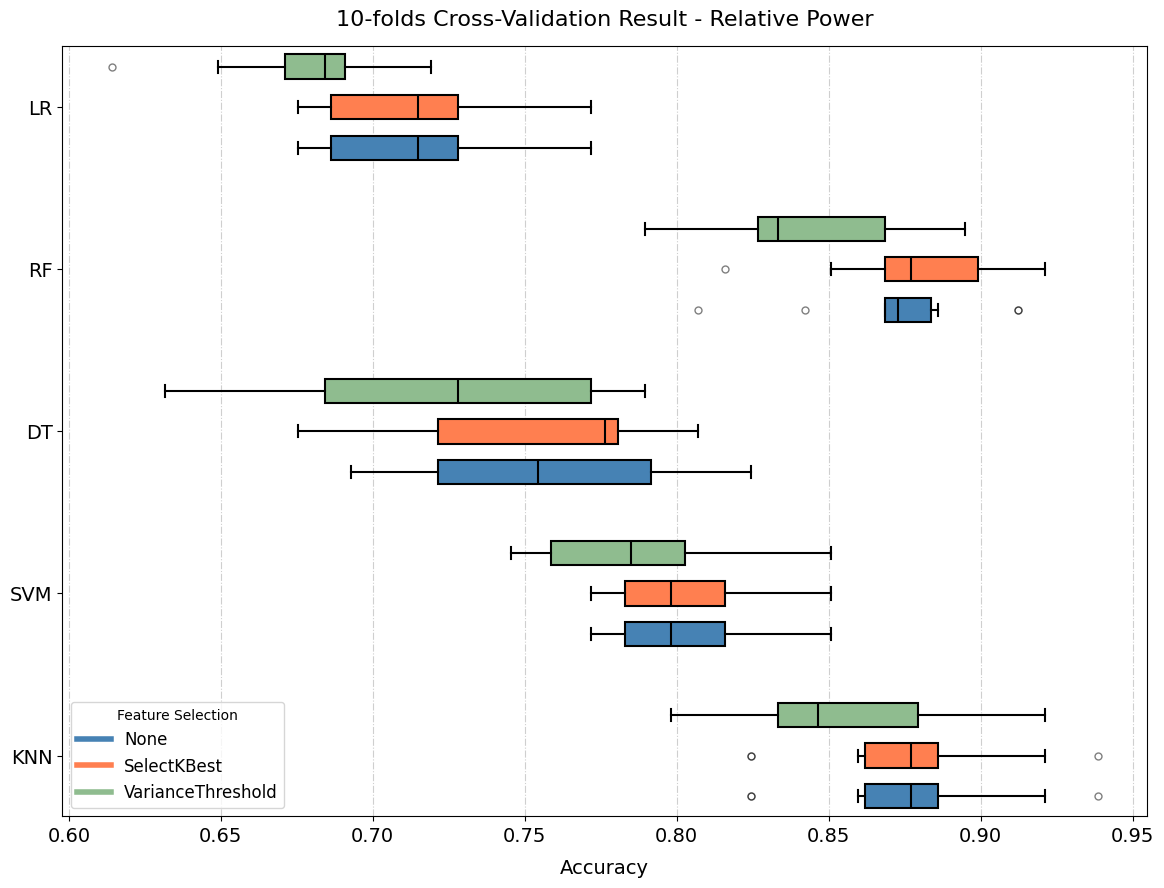

In [15]:
modelsLst = ["KNN", "SVM", "DT", "RF", "LR"]
featureSelectionLst = ["None", "SelectKBest", "VarianceThreshold"]
fig, ax = plt.subplots(figsize=(14, 10))

yPositions = []
y_labels = []
boxHeight = 0.6 

for i, model in enumerate(modelsLst):
    for j, feature in enumerate(featureSelectionLst):
        y_pos = i * 4 + j  # Space them apart
        yPositions.append(y_pos)
        ax.boxplot(allFoldsAccuracy[i * 3 + j], positions=[y_pos], vert=False, widths=boxHeight, patch_artist=True,
                   boxprops=dict(facecolor=boxColors[j], linewidth=1.5),
                   medianprops=dict(color='black', linewidth=1.5, linestyle="-"),
                   whiskerprops=dict(linewidth=1.5),
                   capprops=dict(linewidth=1.5),
                   flierprops=dict(marker='o', markersize=5, alpha=0.5))
    y_labels.append(model)

ax.set_yticks([np.mean(yPositions[i * 3 : i * 3 + 3]) for i in range(len(modelsLst))])
ax.set_yticklabels(y_labels, fontsize=14)
ax.set_xlabel("Accuracy", fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelsize=14) 
graphTitle = f"10-folds Cross-Validation Result - {whichFeatures}"
ax.set_title(graphTitle, fontsize=16, pad=15)
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in boxColors]
ax.legend(handles, featureSelectionLst, title="Feature Selection", fontsize=12, loc="lower left")
plt.grid(axis="x", linestyle="-.", alpha=0.6)

plt.savefig(f"{currentWorkDir}/hori_boxplot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()